In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [2]:
audio, sr = librosa.load("../data/work/10/common_voice_en_18499859.mp3")
ipd.Audio("../data/work/10/common_voice_en_18499859.mp3")

In [3]:
FRAME_SIZE = 256
HOP_LENGTH = 128

### 1. Root_mean_squared energy

In [4]:
rms = librosa.feature.rms(y=audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms

array([2.53097682e-11, 1.37985165e-10, 3.86317478e-10, 3.84597278e-08,
       7.59481918e-06, 2.68859585e-04, 3.95446958e-04, 4.32389439e-04,
       4.90735576e-04, 5.26718970e-04, 4.80317307e-04, 4.65502788e-04,
       5.38781984e-04, 5.33469894e-04, 4.27872670e-04, 4.98551875e-04,
       5.22326853e-04, 4.38145158e-04, 5.67781448e-04, 5.38940891e-04,
       3.81757854e-04, 4.87997284e-04, 5.40408480e-04, 4.81795345e-04,
       4.88391437e-04, 4.91082494e-04, 3.91295558e-04, 3.98819742e-04,
       4.45469632e-04, 5.30386693e-04, 5.18844055e-04, 3.93275084e-04,
       4.64448356e-04, 4.68648941e-04, 4.37045092e-04, 4.24912141e-04,
       4.12308989e-04, 4.44725098e-04, 4.04350809e-04, 4.38785530e-04,
       5.00078255e-04, 4.89781436e-04, 3.98216129e-04, 4.46617167e-04,
       5.10538288e-04, 3.94851988e-04, 4.34057118e-04, 4.59399016e-04,
       4.19359887e-04, 4.27792023e-04, 4.58663853e-04, 5.19120600e-04,
       4.79165086e-04, 4.80604067e-04, 5.24548697e-04, 4.47047583e-04,
      

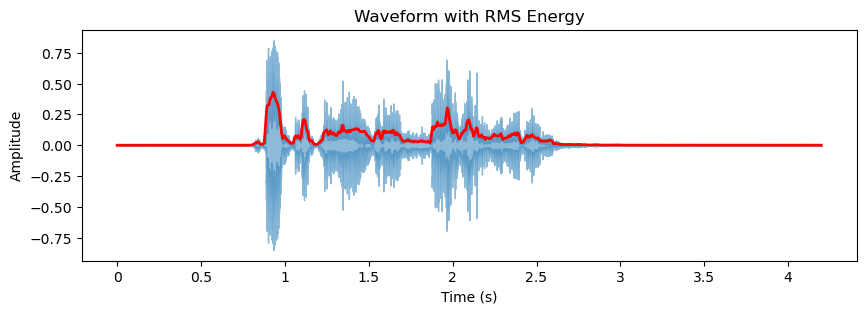

In [5]:
frames = range(len(rms))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio, alpha=0.5, sr=sr)
plt.plot(t, rms, color="r", linewidth=2)
plt.title("Waveform with RMS Energy")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.show()

### 2. Zero_crossing_rate

In [6]:
zcr = librosa.feature.zero_crossing_rate(
    audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH
)[0]

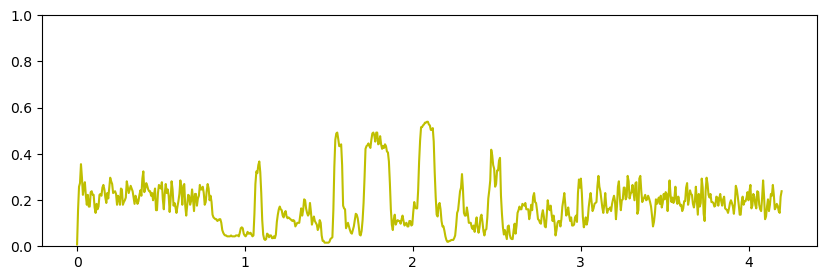

In [7]:
plt.figure(figsize=(10, 3))

plt.plot(t, zcr, color="y")
plt.ylim(0, 1)
plt.show()

### 3. Amplitude Envelope

In [8]:
def amplitude_envelope(signal, frame_size, hop_length):
    return np.array(
        [max(signal[i : i + frame_size]) for i in range(0, len(signal), hop_length)]
    )

In [9]:
ae = amplitude_envelope(audio, FRAME_SIZE, HOP_LENGTH)

Text(67.09722222222221, 0.5, 'Amplitude')

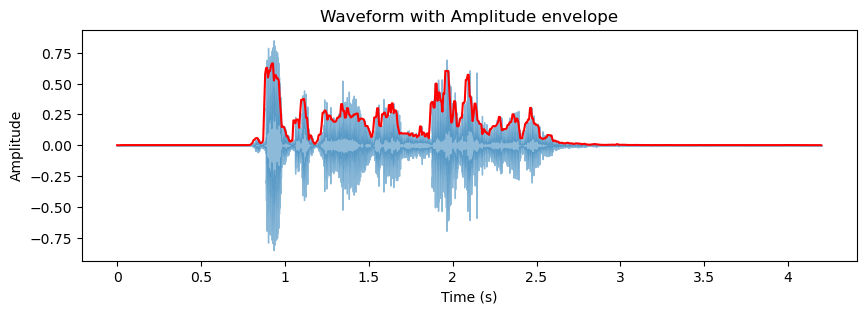

In [10]:
plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio, alpha=0.5)
plt.plot(t, ae, color="r")
plt.title("Waveform with Amplitude envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

### Using class FeatureExtractor

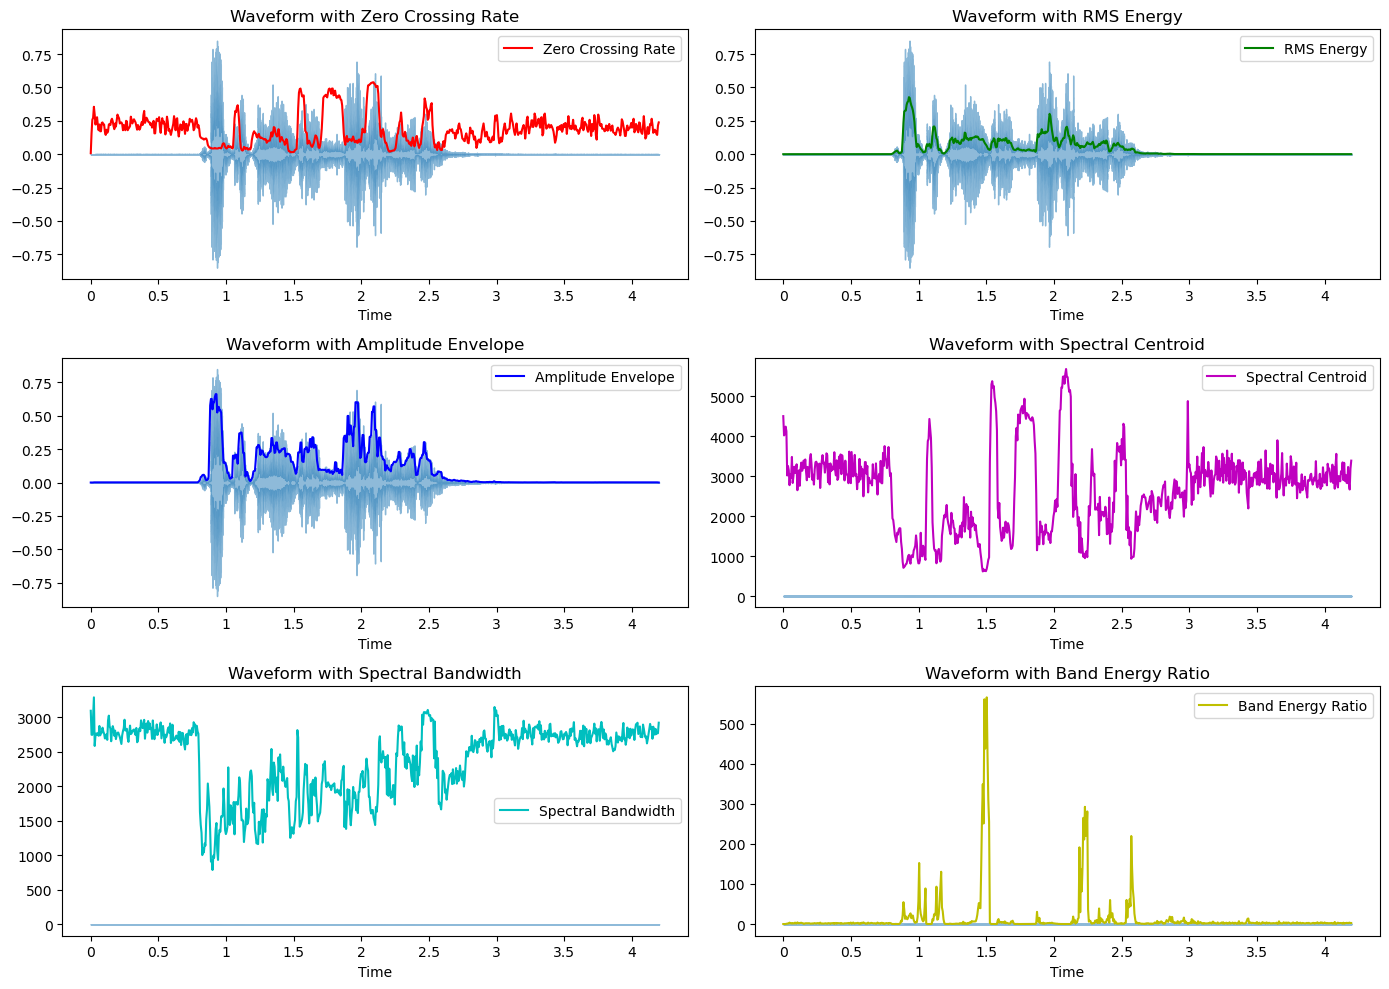

In [11]:
from featureExtractor import FeatureExtractor

extractor = FeatureExtractor(sr=sr, frame_size=FRAME_SIZE, hop_length=HOP_LENGTH)
extractor.plot_features(audio)